In [1]:
library(dplyr)
library(R.matlab)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attache Paket: ‘R.matlab’


Die folgenden Objekte sind maskiert von ‘package:base’:

    getOption, isOpen




In [2]:
# Define a function to show face images ####
showFace <- function(x, m, n) {
  x %>%
  as.numeric() %>%
  matrix(nrow = m, ncol=n) %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

In [3]:
# Define a function to calculate the Euclidean distance between two vectors with weights####
calDif <- function(x){
  ((x-coefTestSel) %*% t(x-coefTestSel)) %>%
    sqrt
}

In [4]:
#Load data
mat_contents <- readMat("../DATA/allFaces.mat")

faces <- mat_contents$faces %>% data.frame()

m <- as.numeric(mat_contents$m)

n <- as.numeric(mat_contents$n)

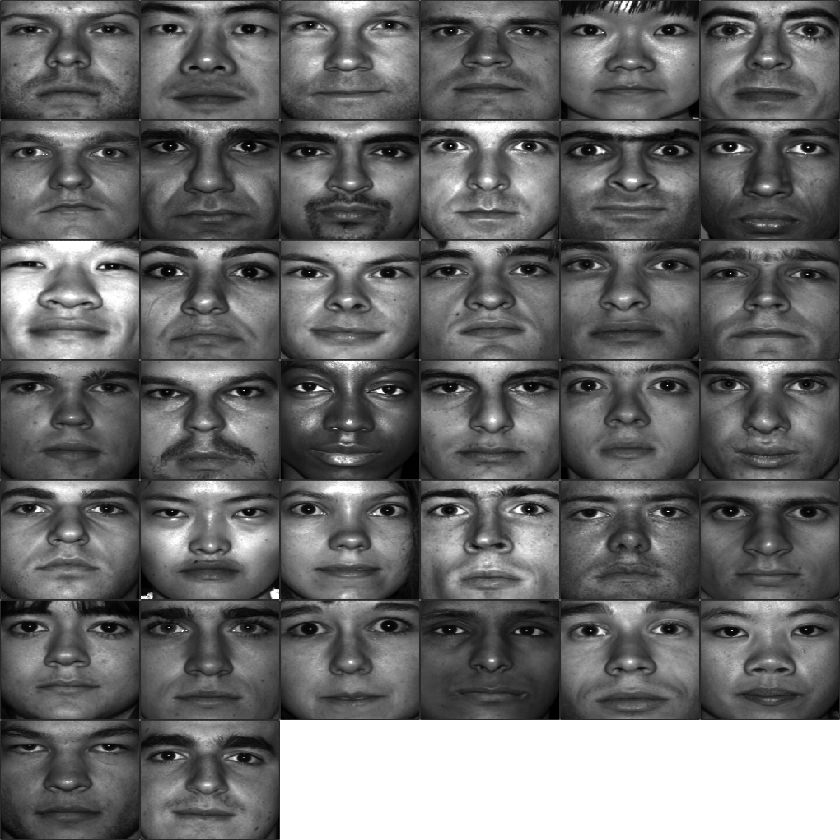

In [5]:
# display first face from every person
# 38 persons
par(mfrow=c(7, 6))
par(mar=c(0.05, 0.05, 0.05, 0.05))
#options(repr.plot.width=3, repr.plot.height=3.5)

j <- 1
for (i in 1:mat_contents$person) {
  showFace(faces[,j], n, m)
  j <- j + mat_contents$nfaces[i]
  }

In [6]:
# get number of pictures for train set for the first 36 people
num_trainfaces <- sum(mat_contents$nfaces[1:36])
# we use first 36 people as training set
trainingFaces <- faces[,1:num_trainfaces]

# Compute and display the average face (mean by each column) #### 
avFace <- rowMeans(trainingFaces)

#Center data
dataMatCen <- scale(trainingFaces, center = TRUE, scale = FALSE)

#Compute SVD
res <- svd(dataMatCen)

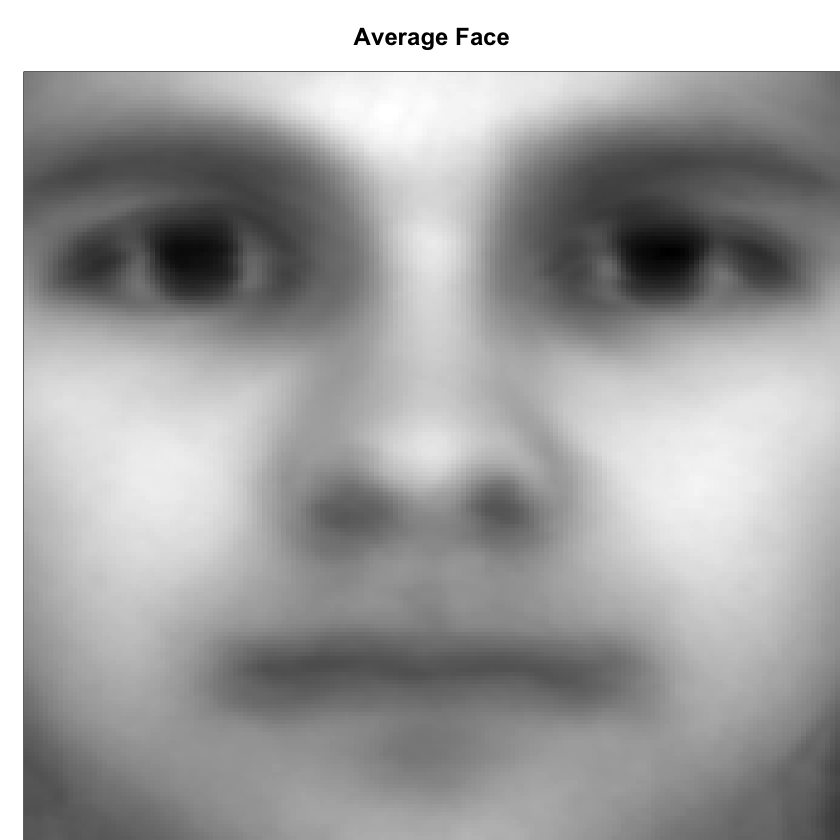

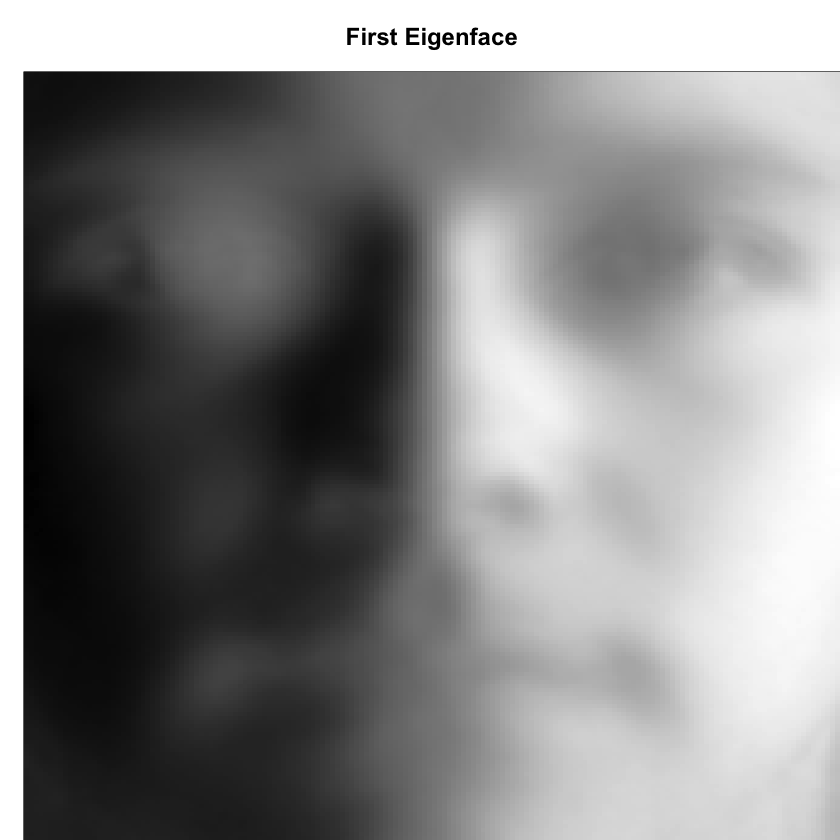

In [9]:
#options(repr.plot.width=5, repr.plot.height=3)
par(mfrow = c(1, 1), mar=c(0, 1, 3, 0))

showFace(avFace, n, m)
title("Average Face")
showFace(res$u[,1], n, m)
title("First Eigenface")

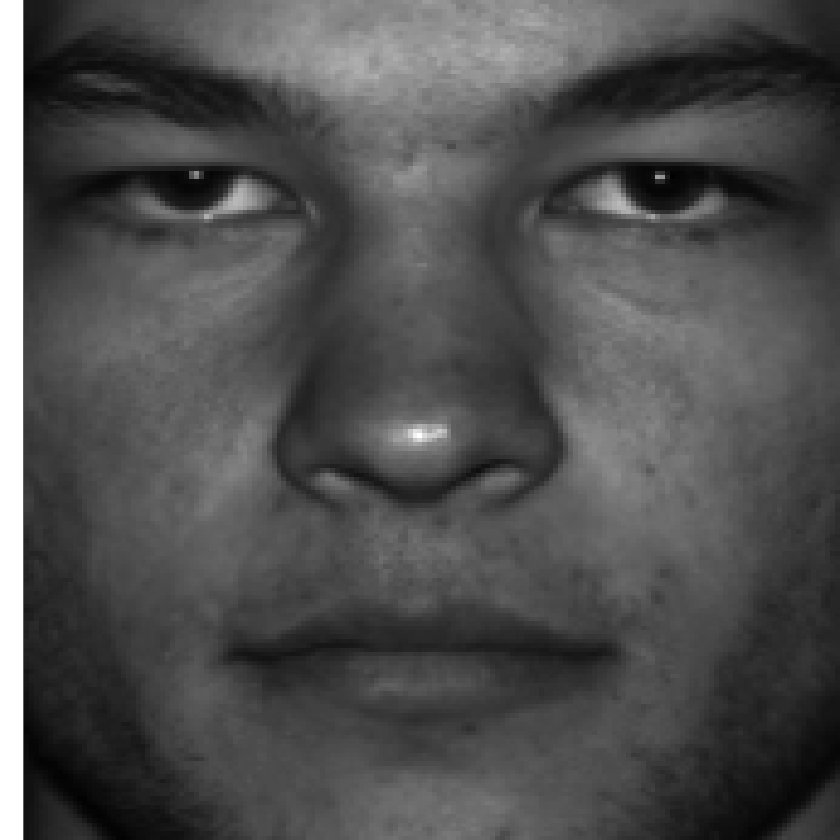

In [10]:
#options(repr.plot.width=3, repr.plot.height=3)
par(mfrow = c(1, 1), mar=c(0, 1, 0, 0))
showFace(faces[,num_trainfaces+1], n, m)
# This face we'll try to restore (37th person)

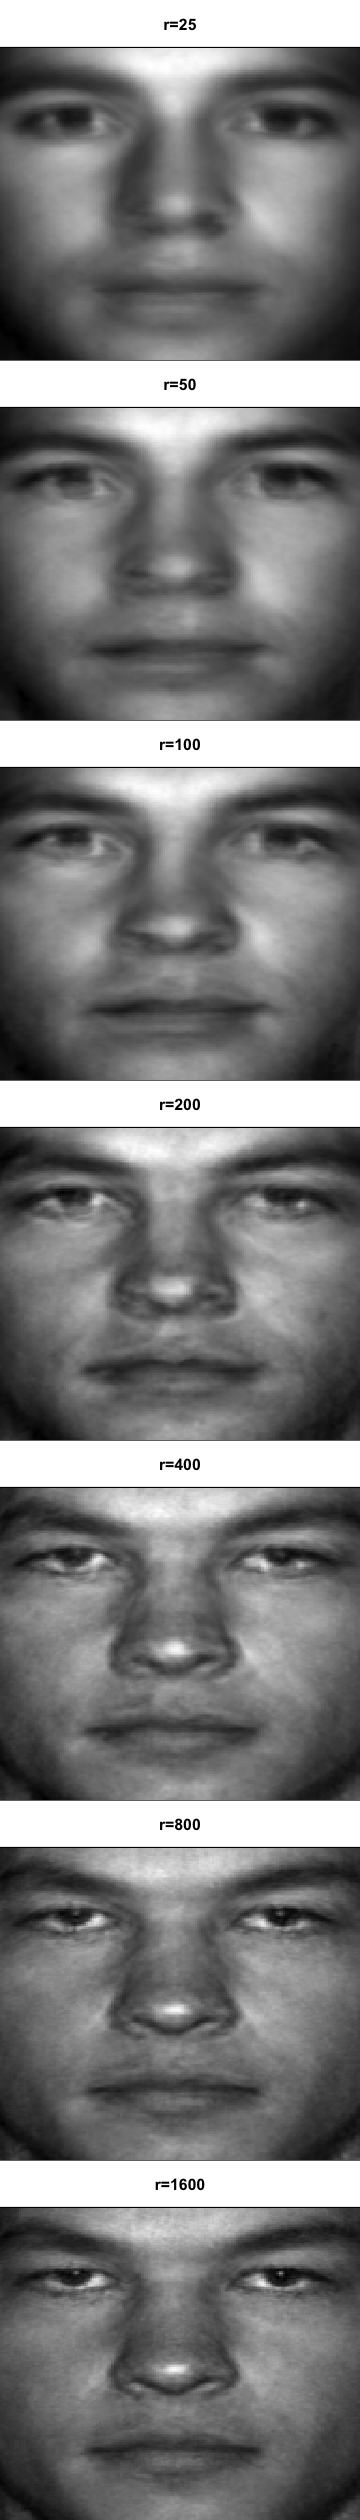

In [23]:
testFaceMS <- faces[,num_trainfaces+1] - avFace

#Now show eigenface reconstruction of image that was omitted from test set
rv <- c(25, 50, 100, 200, 400, 800, 1600)

options(repr.plot.width=3, repr.plot.height=3*length(rv))
par(mfrow = c(length(rv), 1), mar=c(0, 0, 3, 0))

for (r in rv) {
    reconFace <- avFace + res$u[,1:r] %*% t(res$u[,1:r]) %*% as.numeric(testFaceMS)
    showFace(reconFace, n, m)
    title(paste0("r=",r))
}


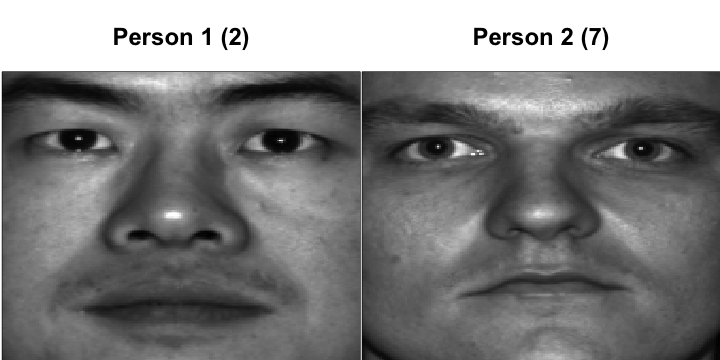

In [24]:
## Project person 2 and 7 onto PC5 and PC6

P1num <- 2 # Person number 2
P2num <- 7 # Person number 7

options(repr.plot.width=6, repr.plot.height=3)
par(mfrow = c(1, 2), mar=c(0, 0.1, 3, 0))

P1index <- 1 + sum(mat_contents$nfaces[1:P1num-1])
P1 <- faces[,P1index:(P1index+mat_contents$nfaces[P1num])] # take all pictures for person 1
showFace(P1[,1], n, m)
title(paste0("Person 1 (",P1num,")"))

P2index <- 1 + sum(mat_contents$nfaces[1:P2num-1])
P2 <- faces[,P2index:(P2index+mat_contents$nfaces[P2num])]
showFace(P2[,1], n, m)
title(paste0("Person 2 (",P2num,")"))


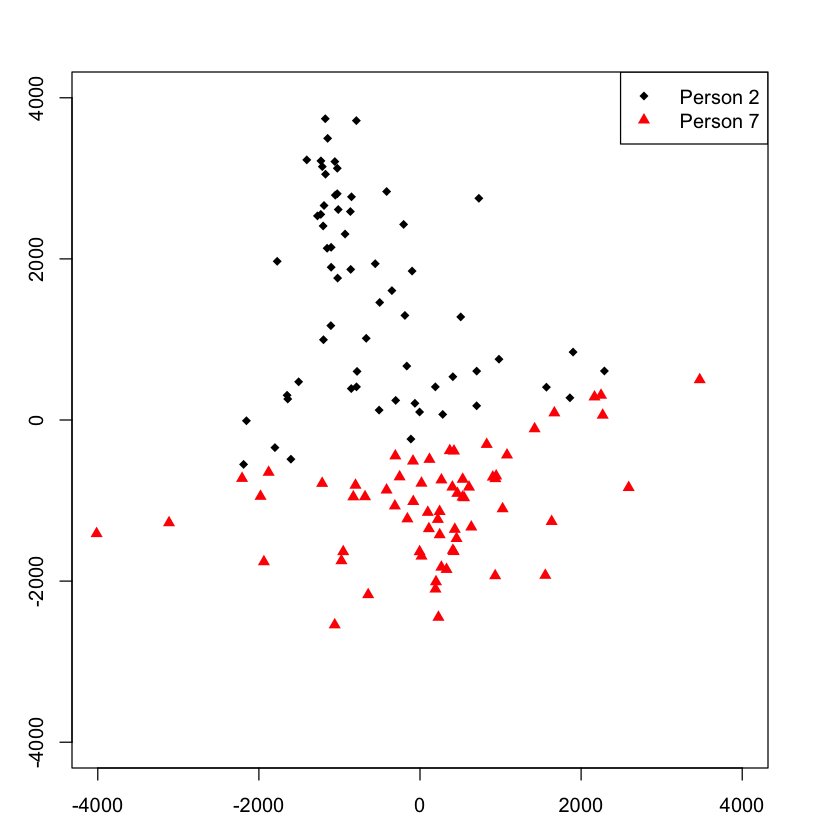

In [28]:
avFace2 <- do.call(rbind, replicate(mat_contents$nfaces[P1num], avFace, simplify=FALSE))



P1 <- P1 - t(avFace2)
P2 <- P2 - t(avFace2)

PCAMode1 <- 5
PCAMode2 <- 6

PCACoordsP1 <- t(res$u[,PCAMode1:PCAMode2]) %*% as.matrix(P1)
PCACoordsP2 <- t(res$u[,PCAMode1:PCAMode2]) %*% as.matrix(P2)

options(repr.plot.width=7, repr.plot.height=7)
par(mfrow = c(1, 1), mar=c(3, 3, 3, 3))
plot(PCACoordsP1[1,], PCACoordsP1[2,], pch=18, col="black", xlim=c(-4000, 4000), ylim=c(-4000, 4000))
points(PCACoordsP2[1,], PCACoordsP2[2,], pch=17, col="red")
legend("topright", legend=c(paste0("Person ", P1num), paste0("Person ", P2num)), 
       col=c("black", "red"), lwd=1, lty=c(NA,NA), 
       pch=c(18,17))